# Used Cars Price Prediction - Project - Prediction Model

## Importing necessary libraries

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
data = pd.read_excel(r'C:\Users\Sahil.Kumar\Desktop\Internship - Flip Robo Technologies\6. Submission - Used Car Price Prediction\Used Cars Price Prediction - Data.xlsx')

In [3]:
data

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,Maruti Wagon R,2017,41174,Petrol,Automatic,1,20.51,998,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,70000,Diesel,Automatic,1,22.00,1582,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,14667,Diesel,Automatic,1,18.25,1968,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,55000,Petrol,Automatic,1,18.00,1497,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,30486,Diesel,Automatic,1,16.10,1950,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6219,Ford EcoSport . Diesel Titanium BSIV,2019,30000,Diesel,Manual,1,23.00,1498,990000,Pune
6220,Maruti Wagon R VXI Plus,2017,40000,Petrol,Manual,1,20.51,998,450000,Pune
6221,Toyota Yaris G BSIV,2018,23643,Petrol,Manual,1,17.10,1496,1000000,Pune
6222,Hyundai Verna . VTVT,2012,69000,Petrol,Manual,1,17.43,1396,465000,Pune


In [4]:
data.shape

(6224, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6224 entries, 0 to 6223
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              6224 non-null   object 
 1   Make_Year          6224 non-null   int64  
 2   Driven_Kilometers  6224 non-null   int64  
 3   Fuel               6224 non-null   object 
 4   Transmission       6224 non-null   object 
 5   Owner(s)           6224 non-null   int64  
 6   Mileage            6224 non-null   float64
 7   Engine             6224 non-null   int64  
 8   Price              6224 non-null   int64  
 9   Location           6224 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 486.4+ KB


In [6]:
data.isnull()

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6219,False,False,False,False,False,False,False,False,False,False
6220,False,False,False,False,False,False,False,False,False,False
6221,False,False,False,False,False,False,False,False,False,False
6222,False,False,False,False,False,False,False,False,False,False


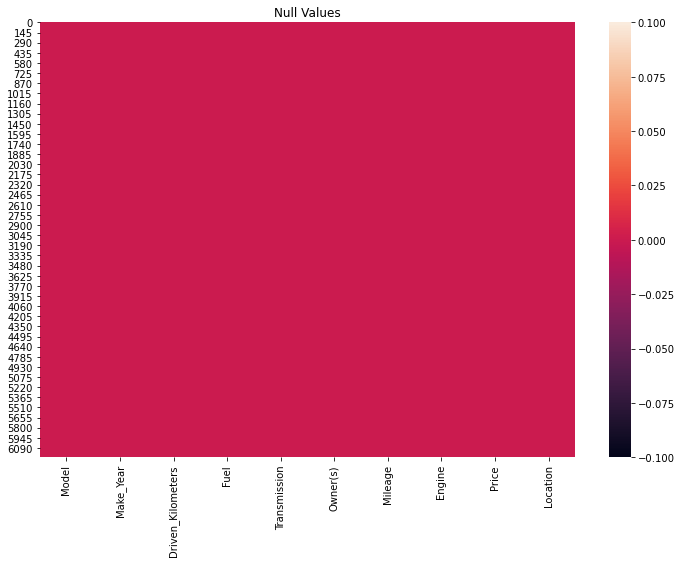

In [7]:
plt.figure(figsize = [12,8])
sns.heatmap(data.isnull())
plt.title('Null Values')
plt.show()

There are no null values in our dataset.

In [8]:
data.dtypes

Model                 object
Make_Year              int64
Driven_Kilometers      int64
Fuel                  object
Transmission          object
Owner(s)               int64
Mileage              float64
Engine                 int64
Price                  int64
Location              object
dtype: object

In [9]:
data.describe()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
count,6224.000000,6224.000000,6224.000000,6224.000000,6224.000000,6.224000e+03
mean,2014.862789,58242.295148,1.214653,19.957942,1405.529724,7.030040e+05
std,3.056772,37702.893801,0.467354,3.872215,467.313843,7.639553e+05
min,2000.000000,500.000000,1.000000,7.500000,624.000000,4.500000e+04
25%,2013.000000,32119.250000,1.000000,17.400000,1197.000000,3.550000e+05
50%,2015.000000,55000.000000,1.000000,20.140000,1248.000000,5.000000e+05
75%,2017.000000,77072.250000,1.000000,22.540000,1498.000000,7.000000e+05
max,2021.000000,886253.000000,4.000000,36.000000,5000.000000,9.100000e+06


Based on the above description of the dataset, there is presence of outliers, primarily in Driven_Kilometers and Engine.

## EDA

### Univariate Analysis and Visualizations

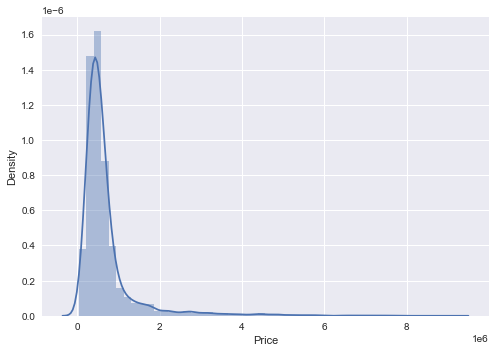

In [10]:
plt.style.use('seaborn')
sns.distplot(data['Price'])
plt.show()

We can see that the price column is not normally distributed, with the prices of some cars higher than the normal.

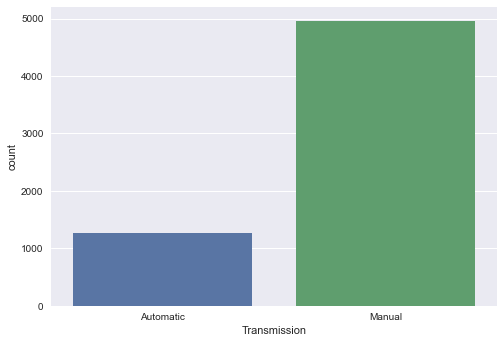

In [11]:
sns.countplot(x = 'Transmission', data = data)
plt.show()

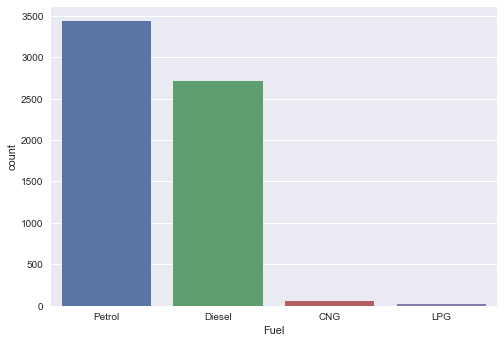

In [13]:
sns.countplot(x = 'Fuel', data = data)
plt.show()

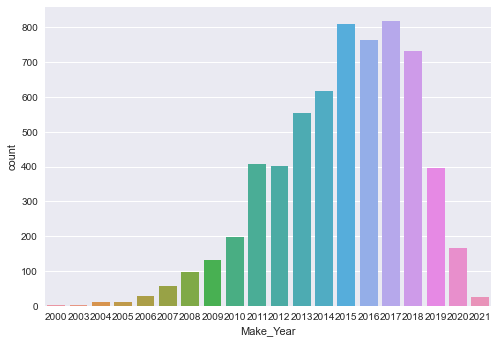

In [14]:
sns.countplot(x = 'Make_Year', data = data)
plt.show()

### Bivariate Analysis and Visualizations

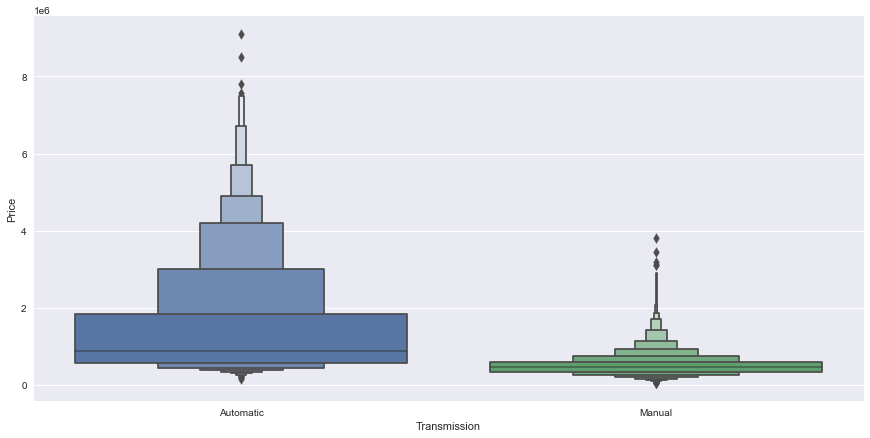

In [16]:
# relationship between price and transmission of vehicle

sns.catplot(y = 'Price', x = 'Transmission', data= data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

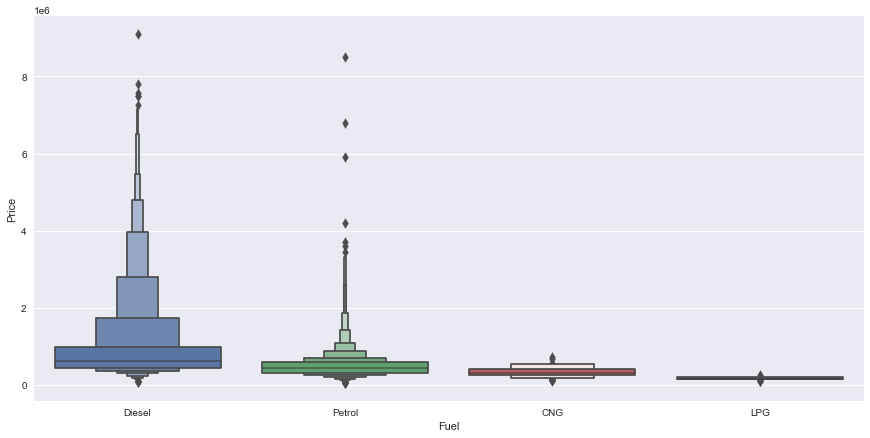

In [17]:
# relationship between price and Fuel type of vehicle

sns.catplot(y = 'Price', x = 'Fuel', data= data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

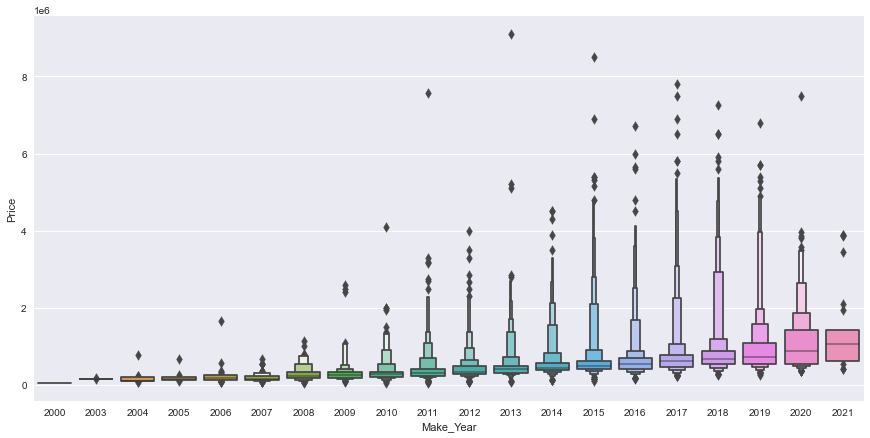

In [18]:
# relationship between price and make year of vehicle

sns.catplot(y = 'Price', x = 'Make_Year', data= data.sort_values("Price", ascending = False), kind = "boxen", height = 6, aspect = 2)

plt.tight_layout
plt.show()

### Multivariate Analysis and Visualizations

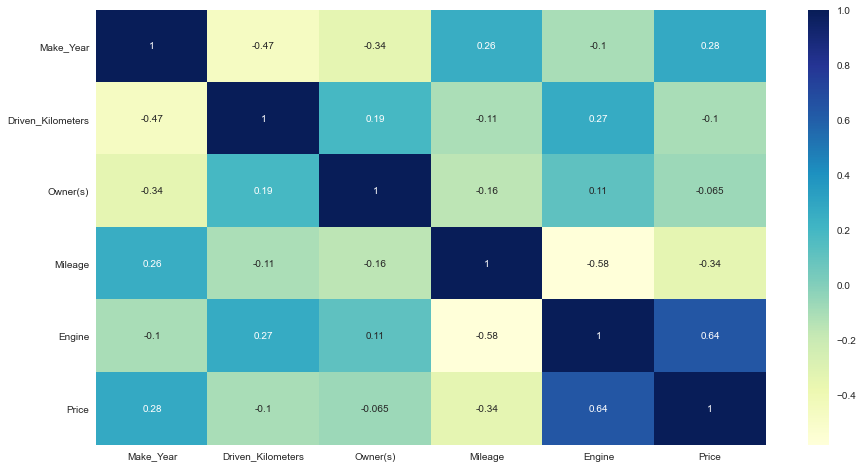

In [19]:
# establishing correlations using heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [20]:
data.corr()

,Make_Year,Driven_Kilometers,Owner(s),Mileage,Engine,Price
Make_Year,1.000000,-0.467516,-0.338092,0.258220,-0.102814,0.278047
Driven_Kilometers,-0.467516,1.000000,0.193648,-0.106689,0.268711,-0.100129
Owner(s),-0.338092,0.193648,1.000000,-0.159762,0.110342,-0.064697
Mileage,0.258220,-0.106689,-0.159762,1.000000,-0.582179,-0.335218
Engine,-0.102814,0.268711,0.110342,-0.582179,1.000000,0.638122
Price,0.278047,-0.100129,-0.064697,-0.335218,0.638122,1.000000


**Findings:**
- Engine and Price are highly correlated
- Number of owners and price are the least correlated 

## Preprocessing

<Figure size 576x396 with 0 Axes>

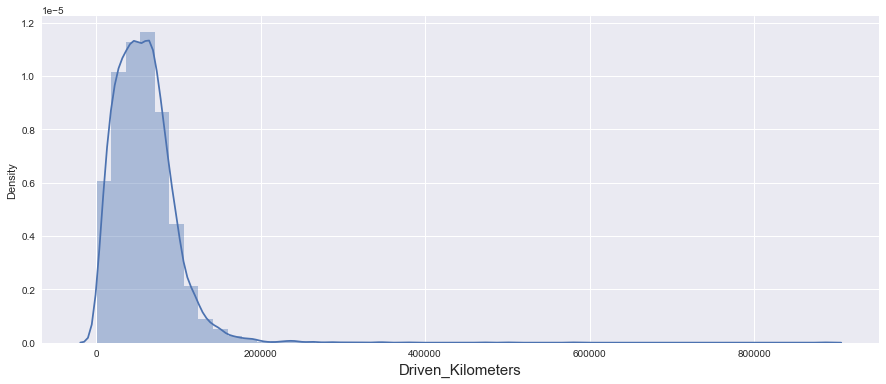

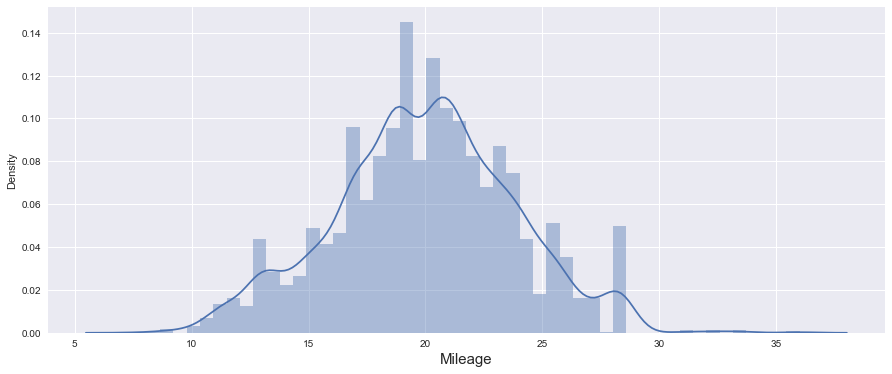

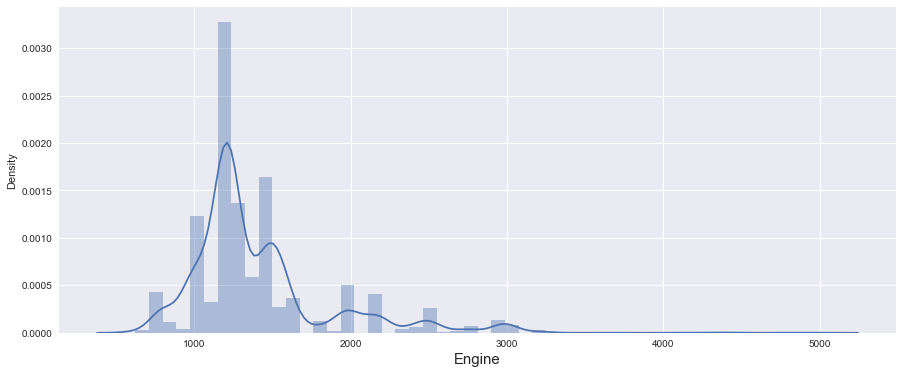

In [21]:
columns = ['Driven_Kilometers', 'Mileage', 'Engine']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.distplot(data[i])
    plt.xlabel(i,fontsize=15)
plt.show()

<Figure size 576x396 with 0 Axes>

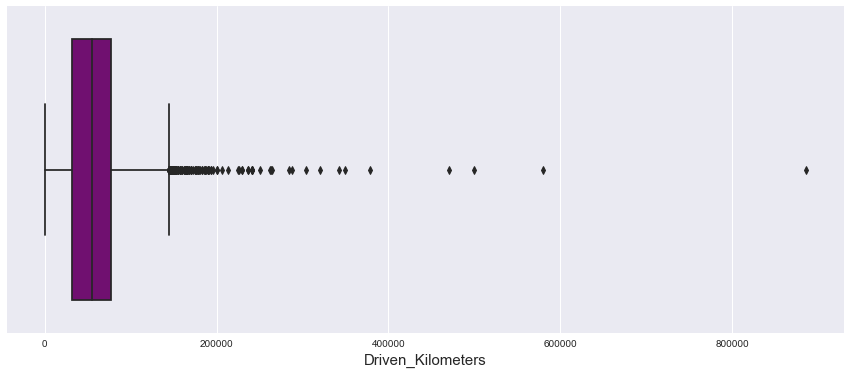

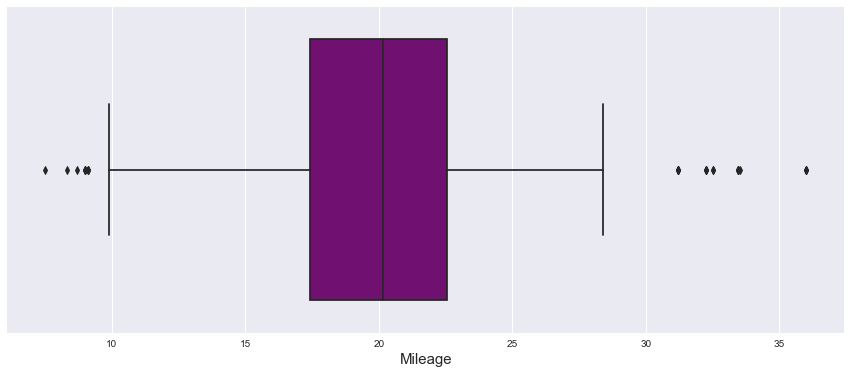

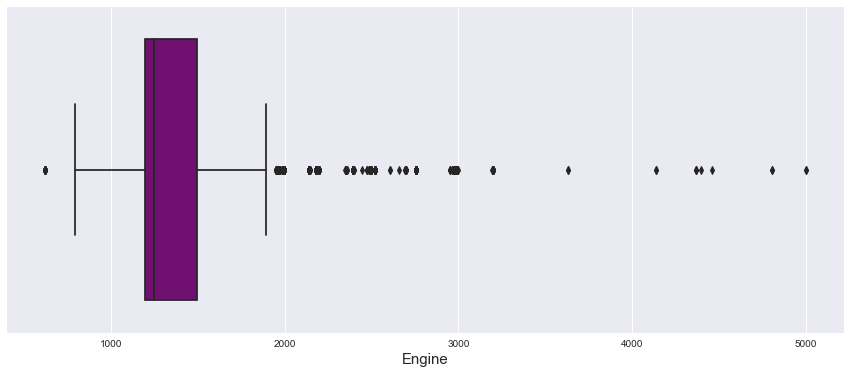

In [22]:
## Checking for outliers

columns = ['Driven_Kilometers', 'Mileage', 'Engine']

plt.tight_layout()
for i in columns:
    plt.figure(figsize=[15,6])
    sns.boxplot(data[i],color = 'Purple')
    plt.xlabel(i,fontsize=15)
plt.show()

All numerical features have outliers present in them

## Removing Outliers

In [23]:
features = ['Driven_Kilometers', 'Mileage', 'Engine']

### 1. IQR method

In [24]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [25]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 10)
Shape After          : (6160, 10)
Percentage Loss      : 1.0282776349614395


### 2. Z-Score method

In [27]:
z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [28]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (6224, 10)
Shape After          : (6017, 10)
Percentage Loss      : 3.3258354755784065


We can proceed with the IQR method since the data loss is lower

In [29]:
data_new = data_new1.copy()

## Skewness Check

In [30]:
data.skew()

Make_Year           -0.611178
Driven_Kilometers    3.696483
Owner(s)             2.253673
Mileage              0.003963
Engine               2.017822
Price                4.320026
dtype: float64

In [31]:
data_new.skew()

Make_Year           -0.611907
Driven_Kilometers    0.701490
Owner(s)             2.244314
Mileage              0.012334
Engine               1.738002
Price                4.160594
dtype: float64

**Findings:**
- Driven_Kilometers and Engine have high skewness
- Skewness in Owner(s) is ignored because the data contained in the column is ordinal
- Skewness in Price is ignored since it is the target variable

In [32]:
data_new['Driven_Kilometers'] = np.sqrt(data_new['Driven_Kilometers'])

data_new['Engine'] = np.log(data_new['Engine'])
data_new['Engine'] = np.cbrt(data_new['Engine'])
data_new['Engine'] = np.sqrt(data_new['Engine'])

In [33]:
data_new.skew()

Make_Year           -0.611907
Driven_Kilometers   -0.130465
Owner(s)             2.244314
Mileage              0.012334
Engine               0.746089
Price                4.160594
dtype: float64

In [35]:
# creating a dataframe of brands from the names of vehicles

df1 = {}
df1 = pd.DataFrame(data_new['Model'].str.split().tolist(), columns="Brand Models A B C D E F G H".split())
df1 = df1.drop(columns=['Models','A','B','C','D','E','F','G','H'],axis=1)

df1['Index'] = range(6160)

df1.set_index('Index',inplace=True)
df1

,Brand
Index,
0,Maruti
1,Hyundai
2,Audi
3,Honda
4,Mercedes-Benz
...,...
6155,Ford
6156,Maruti
6157,Toyota


In [36]:
# assigning the index

data_new['Index'] = range(6160)


data_new.set_index('Index',inplace=True)
data_new

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location
Index,,,,,,,,,,
0,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad
1,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad
2,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad
3,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad
...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune
6156,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune
6157,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune


In [38]:
# combining the datasets

Used_Cars = pd.concat([data_new, df1], axis=1)

In [39]:
Used_Cars

,Model,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
Index,,,,,,,,,,,
0,Maruti Wagon R,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,Hyundai Verna CRDi . AT SX Plus,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,Audi A TDI Premium Plus,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,Honda City i VTEC CVT VX,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,Mercedes-Benz E-Class Exclusive E d BSIV,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...,...
6155,Ford EcoSport . Diesel Titanium BSIV,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,Maruti Wagon R VXI Plus,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,Toyota Yaris G BSIV,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota


In [40]:
# resetting the index

Used_Cars.reset_index('Index',inplace=True)

In [41]:
# removing extra columns

Used_Cars = Used_Cars.drop('Index',axis=1)
Used_Cars = Used_Cars.drop('Model',axis=1)

In [42]:
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,2017,202.913775,Petrol,Automatic,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,2017,264.575131,Diesel,Automatic,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,2018,121.107390,Diesel,Automatic,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,2016,234.520788,Petrol,Automatic,1,18.00,1.393151,877999,Ahmedabad,Honda
4,2019,174.602405,Diesel,Automatic,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...,...
6155,2019,173.205081,Diesel,Manual,1,23.00,1.393173,990000,Pune,Ford
6156,2017,200.000000,Petrol,Manual,1,20.51,1.379966,450000,Pune,Maruti
6157,2018,153.762804,Petrol,Manual,1,17.10,1.393130,1000000,Pune,Toyota
6158,2012,262.678511,Petrol,Manual,1,17.43,1.390924,465000,Pune,Hyundai


In [43]:
Used_Cars['Brand'].unique()

array(['Maruti', 'Hyundai', 'Audi', 'Honda', 'Mercedes-Benz', 'Kia',
       'Skoda', 'Toyota', 'Ford', 'Nissan', 'Jaguar', 'BMW', 'Mini',
       'Volvo', 'Mahindra', 'Volkswagen', 'Renault', 'Land', 'Tata', 'MG',
       'Porsche', 'Mitsubishi', 'Chevrolet', 'New', 'Jeep', 'Datsun',
       'Force', 'Fiat', 'OpelCorsa'], dtype=object)

In [44]:
Used_Cars['Brand'].value_counts()

Maruti           2136
Hyundai          1311
Honda             568
Ford              307
Toyota            289
Volkswagen        280
Mahindra          250
Renault           205
Mercedes-Benz     123
Tata              102
BMW               101
Skoda              99
Audi               91
Chevrolet          67
Nissan             64
Kia                28
Jaguar             20
Land               20
Datsun             20
Jeep               16
MG                 13
Fiat               12
Volvo              11
Mitsubishi         11
Porsche             6
Mini                6
New                 2
OpelCorsa           1
Force               1
Name: Brand, dtype: int64

In [45]:
Used_Cars['Fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG'], dtype=object)

In [46]:
Used_Cars['Make_Year'].unique()

array([2017, 2018, 2016, 2019, 2014, 2015, 2009, 2011, 2013, 2020, 2008,
       2021, 2012, 2007, 2010, 2005, 2004, 2006, 2003, 2000], dtype=int64)

## Encoding categorical data

In [48]:
l1 = ['Transmission','Fuel','Make_Year']

le = LabelEncoder()

for i in l1:
    Used_Cars[i]= le.fit_transform(Used_Cars[i].values.reshape(-1,1))
Used_Cars.head()

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Location,Brand
0,15,202.913775,3,0,1,20.51,1.379966,430000,Ahmedabad,Maruti
1,15,264.575131,1,0,1,22.00,1.394900,894999,Ahmedabad,Hyundai
2,16,121.107390,1,0,1,18.25,1.401707,3200000,Ahmedabad,Audi
3,14,234.520788,3,0,1,18.00,1.393151,877999,Ahmedabad,Honda
4,17,174.602405,1,0,1,16.10,1.401423,4800000,Ahmedabad,Mercedes-Benz


In [49]:
l2=pd.get_dummies(Used_Cars['Brand'])
Used_Cars=pd.concat([Used_Cars.drop('Brand',axis=1),l2],axis=1)

In [50]:
l3=pd.get_dummies(Used_Cars['Location'])
Used_Cars=pd.concat([Used_Cars.drop('Location',axis=1),l3],axis=1)

In [51]:
Used_Cars

,Make_Year,Driven_Kilometers,Fuel,Transmission,Owner(s),Mileage,Engine,Price,Audi,BMW,...,Chennai,Gurgaon,Hyderabad,Jaipur,Kolkata,Mumbai,NCR,New Delhi,Noida,Pune
0,15,202.913775,3,0,1,20.51,1.379966,430000,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,264.575131,1,0,1,22.00,1.394900,894999,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,121.107390,1,0,1,18.25,1.401707,3200000,1,0,...,0,0,0,0,0,0,0,0,0,0
3,14,234.520788,3,0,1,18.00,1.393151,877999,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,174.602405,1,0,1,16.10,1.401423,4800000,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,17,173.205081,1,1,1,23.00,1.393173,990000,0,0,...,0,0,0,0,0,0,0,0,0,1
6156,15,200.000000,3,1,1,20.51,1.379966,450000,0,0,...,0,0,0,0,0,0,0,0,0,1
6157,16,153.762804,3,1,1,17.10,1.393130,1000000,0,0,...,0,0,0,0,0,0,0,0,0,1
6158,10,262.678511,3,1,1,17.43,1.390924,465000,0,0,...,0,0,0,0,0,0,0,0,0,1


## Splitting features and label

In [52]:
X = Used_Cars.drop(columns = 'Price')
Y = Used_Cars['Price']

In [53]:
X.shape

(6160, 48)

In [54]:
Y.shape

(6160,)

## Applying Standard Scaler

In [56]:
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

## Best Random State

In [59]:
maxR2_Score = 0
maxRS = 0

for i in range(300):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.20,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    Score = r2_score(y_test,predrf)
    if Score>maxR2_Score:
        maxR2_Score = Score
        maxRS = i
        
print('The best accuracy is ',maxR2_Score, ' with Random State ',maxRS)

The best accuracy is  0.7853337991089029  with Random State  148


## Train Test Split

In [60]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, Y, test_size =0.20, random_state = maxRS)

## Building the prediction model

RandomForestRegressor()
R Squared (R2):  90.88377672361042
Mean Squared Error (MSE):  50950497108.42879
Root Mean Squared Error (RMSE):  225722.16795970392
Mean Absolute Error (MAE):  82787.13565045223


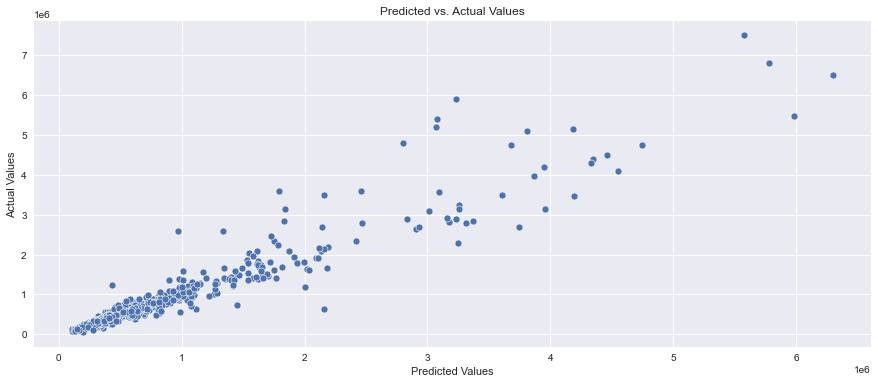

------------------------------------------------------------------------------------------------------------------------
KNeighborsRegressor()
R Squared (R2):  77.65874769809187
Mean Squared Error (MSE):  124865075842.8838
Root Mean Squared Error (RMSE):  353362.52750239917
Mean Absolute Error (MAE):  152638.39074675326


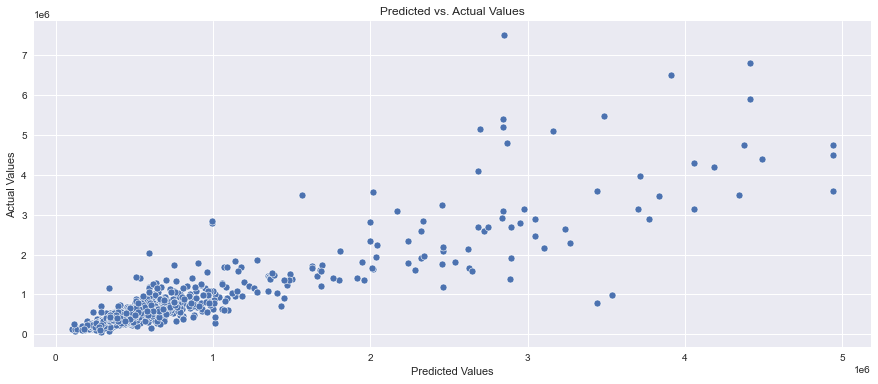

------------------------------------------------------------------------------------------------------------------------
DecisionTreeRegressor(max_features='auto')
R Squared (R2):  85.71820756917948
Mean Squared Error (MSE):  79820820737.71753
Root Mean Squared Error (RMSE):  282525.7877393098
Mean Absolute Error (MAE):  97981.56331168831


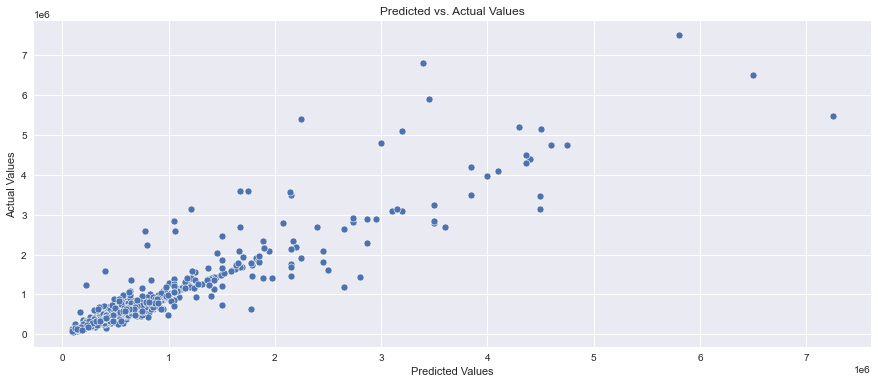

------------------------------------------------------------------------------------------------------------------------
Lasso()
R Squared (R2):  78.53383251107547
Mean Squared Error (MSE):  119974234001.72075
Root Mean Squared Error (RMSE):  346372.96950212604
Mean Absolute Error (MAE):  183979.7163302098


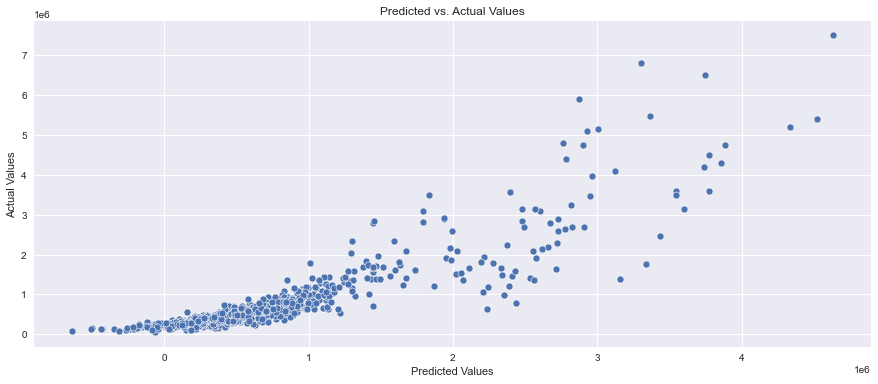

------------------------------------------------------------------------------------------------------------------------
Ridge()
R Squared (R2):  78.53290464518219
Mean Squared Error (MSE):  119979419836.5867
Root Mean Squared Error (RMSE):  346380.45533284167
Mean Absolute Error (MAE):  183970.27969762788


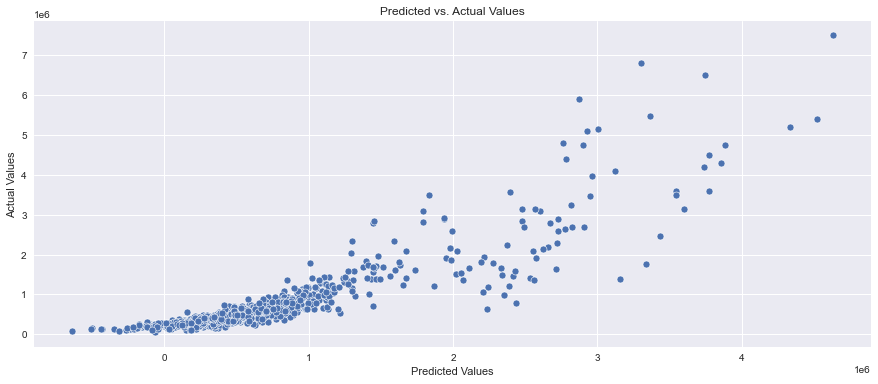

------------------------------------------------------------------------------------------------------------------------


In [62]:
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
dt = DecisionTreeRegressor(max_features='auto')
ls=Lasso()
rd=Ridge()

model=[rf,kn,dt,ls,rd]
kf = KFold(n_splits=5, random_state=43, shuffle=True)

train=[]
test=[]
cv=[]

for m in model:
    m = m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    print(m)
    print('R Squared (R2): ',test_score*100)
    print('Mean Squared Error (MSE): ',mean_squared_error(y_test,pred_test))
    print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, pred_test)))
    print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,pred_test))
    score=cross_val_score(m,X_scaled,Y,cv=kf)
    cv.append(score.mean()*100)
    plt.figure(figsize=[15,6])
    sns.scatterplot(x=pred_test, y=y_test)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Predicted vs. Actual Values')
    plt.show()
    print('-'*120)
    
    
    
    
Overall_score={'Model':['RandomForest','KNN','DecisionTree Regressor','Lasso','Ridge'], 'Training Score':train, 'Test Score':test,'Cross Validation Score': cv}

Overall_score=pd.DataFrame(data=Overall_score)

In [63]:
Overall_score

,Model,Training Score,Test Score,Cross Validation Score
0,RandomForest,98.810911,90.883777,89.093188
1,KNN,83.482652,77.658748,74.881360
2,DecisionTree Regressor,99.998558,85.718208,80.630116
3,Lasso,73.920469,78.533833,73.348394
4,Ridge,73.920467,78.532905,73.348618


In [64]:
Overall_score['Difference'] = Overall_score['Test Score'] - Overall_score['Cross Validation Score']
Overall_score

,Model,Training Score,Test Score,Cross Validation Score,Difference
0,RandomForest,98.810911,90.883777,89.093188,1.790589
1,KNN,83.482652,77.658748,74.881360,2.777388
2,DecisionTree Regressor,99.998558,85.718208,80.630116,5.088092
3,Lasso,73.920469,78.533833,73.348394,5.185438
4,Ridge,73.920467,78.532905,73.348618,5.184286


### It appears that `Random Forest` is our best model since it has a high r2 score and lowest difference r2 score and cvs.

## Hyperparameter Tuning

In [66]:
param_grid = {'n_estimators':[50,100],
             'max_features':['auto','sqrt'],
             'max_depth':[4,5,None],'min_samples_split' : [2, 5, 10],
             'criterion':['squared_error','mse'],'min_samples_leaf': [1, 2, 3]}   

gridsearch=GridSearchCV(estimator = rf, param_grid = param_grid,cv=5)     

gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'mse'],
                         'max_depth': [4, 5, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [67]:
gridsearch.best_score_

0.9001941155814615

In [68]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [69]:
Rand_Final = RandomForestRegressor(n_estimators=100,max_features='auto',max_depth=None,criterion='mse',
                                   min_samples_split=2,min_samples_leaf=1)

Rand_Final.fit(x_train,y_train)
predictions = Rand_Final.predict(x_test)

In [70]:
print('R Squared (R2): ',r2_score(y_test,predictions))
print('Mean Squared Error (MSE): ',mean_squared_error(y_test,predictions))
print('Root Mean Squared Error (RMSE): ',np.sqrt(mean_squared_error(y_test, predictions)))
print('Mean Absolute Error (MAE): ',mean_absolute_error(y_test,predictions))

R Squared (R2):  0.907346140378023
Mean Squared Error (MSE):  51784166135.78089
Root Mean Squared Error (RMSE):  227561.34587354877
Mean Absolute Error (MAE):  82233.35564631649


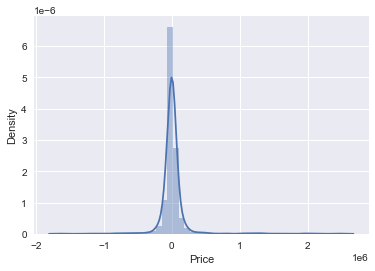

In [71]:
sns.distplot(y_test-predictions)
plt.show()

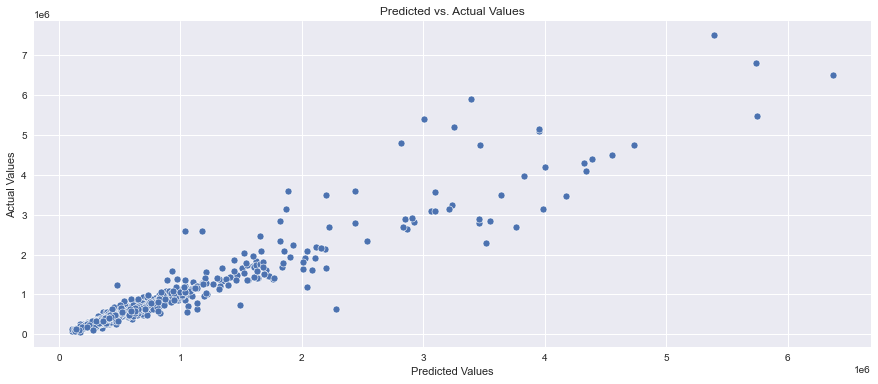

In [72]:
plt.figure(figsize=[15,6])
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

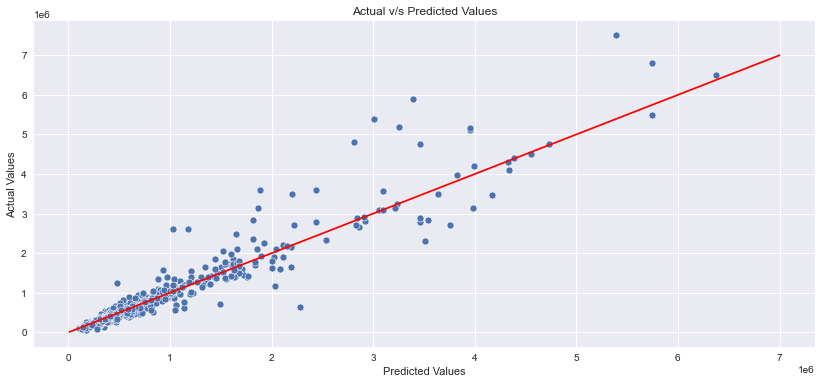

In [73]:
plt.figure(figsize=[14,6])

plot_LOO = sns.scatterplot(predictions,y_test)
plot_LOO.set(xlabel='Predicted Values', ylabel='Actual Values')

x_plot = np.linspace(10000,7000000)
y_plot = x_plot

plt.plot(x_plot, y_plot, color='r')
plt.title("Actual v/s Predicted Values")
plt.show()

## Saving the model

In [79]:
import joblib

joblib.dump(Rand_Final,'Used_Cars_Price_Prediction.pkl')

['Used_Cars_Price_Prediction.pkl']

## Loading the model and predicting the prices

In [80]:
Model = joblib.load("Used_Cars_Price_Prediction.pkl")

In [81]:
Predictions = Model.predict(x_test)

Predictions

array([409766.29, 295350.  , 410034.97, ..., 579974.32, 591860.  ,
       818299.01])

In [82]:
list_of_tuples = list(zip(y_test, Predictions))
Used_Car_Price = pd.DataFrame(list_of_tuples, columns = ['Actual', 'Predicted'])

In [90]:
pd.set_option('display.float_format', '{:.2f}'.format)

Used_Car_Price['Difference'] = Used_Car_Price['Actual'] - Used_Car_Price['Predicted']
Used_Car_Price['Variance'] = (Used_Car_Price['Difference']/Used_Car_Price['Actual'])*100

Used_Car_Price

,Actual,Predicted,Difference,Variance
0,484999,409766.29,75232.71,15.51
1,325000,295350.00,29650.00,9.12
2,447500,410034.97,37465.03,8.37
3,395000,381054.99,13945.01,3.53
4,235500,235560.00,-60.00,-0.03
5,416500,414109.98,2390.02,0.57
6,529500,482904.81,46595.19,8.80
7,795000,812941.18,-17941.18,-2.26
8,550000,637847.02,-87847.02,-15.97
9,414000,439880.00,-25880.00,-6.25


In [91]:
Used_Car_Price.to_csv('Predicted_Car_Prices.csv')

# `END`